<a href="https://colab.research.google.com/github/sumanth-nallajonnala/Demo/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price']]


In [5]:
data = data.dropna()


In [7]:
# Remove extreme outliers in square footage
data = data[data['sqft_living'] < 5000]

# Remove unrealistic bedroom counts
data = data[data['bedrooms'] < 10]


In [8]:
data.describe()


,sqft_living,bedrooms,bathrooms,price
count,21393.000000,21393.000000,21393.000000,2.139300e+04
mean,2040.603562,3.355256,2.093407,5.247616e+05
std,827.939079,0.893498,0.737387,3.151538e+05
min,290.000000,0.000000,0.000000,7.500000e+04
25%,1420.000000,3.000000,1.500000,3.200000e+05
50%,1900.000000,3.000000,2.250000,4.500000e+05
75%,2520.000000,4.000000,2.500000,6.350000e+05
max,4980.000000,9.000000,7.500000,3.640900e+06


In [9]:
data.to_csv("kc_house_data_cleaned.csv", index=False)


In [10]:
from google.colab import files
files.download("kc_house_data_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df = pd.read_csv("kc_house_data_cleaned.csv")
df.head()


,sqft_living,bedrooms,bathrooms,price
0,1180,3,1.00,221900.0
1,2570,3,2.25,538000.0
2,770,2,1.00,180000.0
3,1960,4,3.00,604000.0
4,1680,3,2.00,510000.0


In [12]:
data = df[['sqft_living', 'bedrooms', 'bathrooms', 'price']]
data = data.dropna()
data.head()


,sqft_living,bedrooms,bathrooms,price
0,1180,3,1.00,221900.0
1,2570,3,2.25,538000.0
2,770,2,1.00,180000.0
3,1960,4,3.00,604000.0
4,1680,3,2.00,510000.0


In [13]:
X = data[['sqft_living', 'bedrooms', 'bathrooms']]
y = np.log(data['price'])


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [17]:
y_pred = ridge_model.predict(X_test_scaled)

y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)

print("Mean Squared Error:", mean_squared_error(y_test_exp, y_pred_exp))
print("R2 Score:", r2_score(y_test_exp, y_pred_exp))


Mean Squared Error: 52905630089.37478
R2 Score: 0.4657056428834564


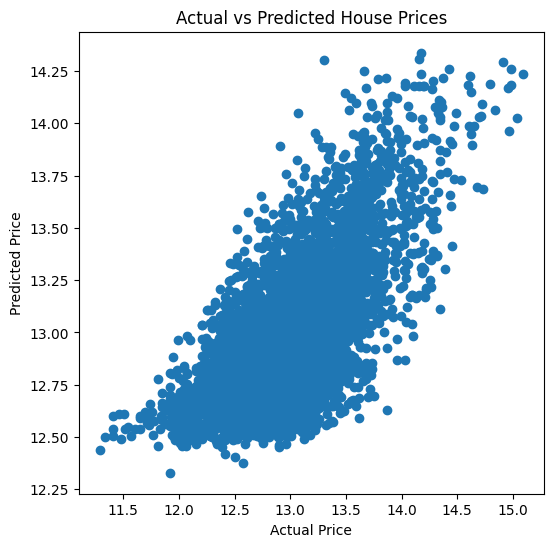

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [18]:
!pip install gradio


In [19]:
import gradio as gr

def predict_price(sqft, bedrooms, bathrooms):
    input_data = np.array([[sqft, bedrooms, bathrooms]])
    input_scaled = scaler.transform(input_data)
    log_price = ridge_model.predict(input_scaled)
    price = np.exp(log_price)
    return f"Predicted House Price: ₹{price[0]:,.2f}"


In [20]:
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Square Footage"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms")
    ],
    outputs=gr.Textbox(label="Predicted Price"),
    title="House Price Prediction",
    description="Improved Linear Regression (Ridge) model using sqft, bedrooms, and bathrooms."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7a9727db6b7df35d89.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
